Barcode Assay Alignment 
---
Performed barcode assay (UTexas) at same time as data from C. Hayford (`idling/treated_raw.csv.gz` and `untreated/untreated_raw.csv.gz`).  
Going to check for barcode abundance in both datasets to see if targeted barcode assay corroborates scRNA-seq data.

In [58]:
# load files and packages
from fst_utils import *
from fcc_utils import *
from fcc_DRs import *
from utilityfunctions import *
sys.path.append('../seq-tools/'); from seq_analysis import *

%matplotlib inline

In [67]:
# reload functions when editing file
import sys
del sys.modules['fcc_DRs']
from fcc_DRs import *

---
Read in scRNA-seq data

In [69]:
%%time
# untreated control BRAF melanoma cell line (SKMEL5)
U = RNA_counts.from_file(datafile='untreated/untreated_raw.csv.gz', cells_axis=1, barcodefile='untreated/Untreated_LineageBC_cellBC.csv')
# treated, idling BRAF melanoma cell line (SKMEL5)
I = RNA_counts.from_file(datafile='idling/treated_raw.csv.gz', cells_axis=1, barcodefile='idling/Treated_LineageBC_cellBC.csv')

CPU times: user 32.8 s, sys: 6.72 s, total: 39.5 s
Wall time: 40.8 s


In [3]:
# look at top 50 most abundant barcodes for now, to make this quicker and prove it works
top50 = list(range(1,51))

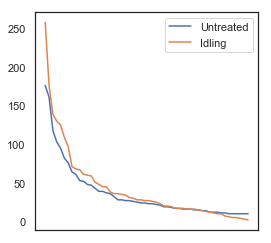

In [4]:
# plot abundance of barcodes in scRNA-seq dataset
plt.figure(figsize=(4,4))
U.barcode_counts(IDs=U.top_barcodes(top50)).plot(label='Untreated', legend=True)
I.barcode_counts(IDs=U.top_barcodes(top50)).plot(label='Idling', legend=True)
plt.show()

Read in associated barcode assay results files, where barcodes were extracted using  
[`codyheiser/seq-tools/seq_extraction.sh`](https://github.com/codyheiser/seq-tools)

In [5]:
%%time
U_R1 = pd.read_csv(gzip.open('untreated/2898-CH-1-CGAAACAT-GTTCAGAG_S1_R1_001.txt.gz'), sep='\t', header=None)
I_R1 = pd.read_csv(gzip.open('idling/2898-CH-2-GGCCACAT-GTTCAGAG_S2_R1_001.txt.gz'), sep='\t', header=None)

CPU times: user 13.2 s, sys: 725 ms, total: 13.9 s
Wall time: 14.3 s


In [6]:
# count instances of unique barcode sequences in untreated set
U_R1_counts = pd.DataFrame(U_R1[0].value_counts())
U_R1_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [7]:
# count instances of unique barcode sequences in idling set
I_R1_counts = pd.DataFrame(I_R1[0].value_counts())
I_R1_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [8]:
# merge results of barcode assay with scRNA-seq barcode abundances
U_R1_50 = pd.DataFrame(U.barcode_counts(U.top_barcodes(top50))).merge(U_R1_counts, how='left', right_index=True, left_index=True)
I_R1_50 = pd.DataFrame(I.barcode_counts(U.top_barcodes(top50))).merge(I_R1_counts, how='left', right_index=True, left_index=True)

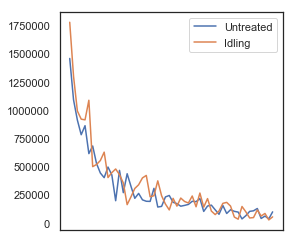

In [9]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_R1_50['Count'].plot(label='Untreated', legend=True)
I_R1_50['Count'].plot(label='Idling', legend=True)
plt.show()

---
Do the same for the second read, taking reverse complement to match 3'-5' barcode sequences

Read in associated barcode assay results files, where barcodes were extracted using  
[`codyheiser/seq-tools/seq_extraction.sh`](https://github.com/codyheiser/seq-tools)  
and [`codyheiser/seq-tools/rev_comp.sh`](https://github.com/codyheiser/seq-tools)

In [10]:
%%time
U_R2 = pd.read_csv(gzip.open('untreated/2898-CH-1-CGAAACAT-GTTCAGAG_S1_R2_001_REVCOMP.txt.gz'), sep='\t', header=None)
I_R2 = pd.read_csv(gzip.open('idling/2898-CH-2-GGCCACAT-GTTCAGAG_S2_R2_001_REVCOMP.txt.gz'), sep='\t', header=None)

CPU times: user 12.9 s, sys: 770 ms, total: 13.7 s
Wall time: 14 s


In [11]:
# count instances of unique barcode sequences in untreated set
U_R2_counts = pd.DataFrame(U_R2[0].value_counts())
U_R2_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [12]:
# count instances of unique barcode sequences in treated set
I_R2_counts = pd.DataFrame(I_R2[0].value_counts())
I_R2_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [13]:
# merge results of barcode assay with scRNA-seq barcode abundances
U_R2_50 = pd.DataFrame(U.barcode_counts(U.top_barcodes(top50))).merge(U_R2_counts, how='left', right_index=True, left_index=True)
I_R2_50 = pd.DataFrame(I.barcode_counts(U.top_barcodes(top50))).merge(I_R2_counts, how='left', right_index=True, left_index=True)

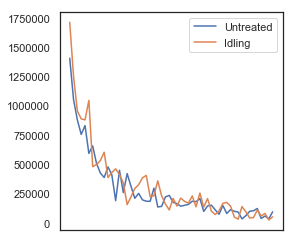

In [14]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_R2_50['Count'].plot(label='Untreated', legend=True)
I_R2_50['Count'].plot(label='Idling', legend=True)
plt.show()

---
Now add UMIs from R1 and R2 to get totals

In [19]:
U_bc = U_R1.append(U_R2)
I_bc = I_R1.append(I_R2)

In [26]:
U_bc_counts = pd.DataFrame(U_bc[0].value_counts())
U_bc_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [27]:
I_bc_counts = pd.DataFrame(I_bc[0].value_counts())
I_bc_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [28]:
# merge results of barcode assay with scRNA-seq barcode abundances
U_bc_50 = pd.DataFrame(U.barcode_counts(U.top_barcodes(top50))).merge(U_bc_counts, how='left', right_index=True, left_index=True)
I_bc_50 = pd.DataFrame(I.barcode_counts(U.top_barcodes(top50))).merge(I_bc_counts, how='left', right_index=True, left_index=True)

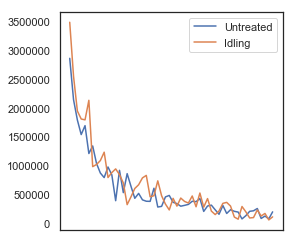

In [29]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_bc_50['Count'].plot(label='Untreated', legend=True)
I_bc_50['Count'].plot(label='Idling', legend=True)
plt.show()

---
Finally, convert counts to fractions of total to normalize for comparison with scRNA-seq data

In [33]:
U_bc_counts_norm = U_bc_counts.div(U_bc_counts.sum(axis=0), axis=1)
I_bc_counts_norm = I_bc_counts.div(I_bc_counts.sum(axis=0), axis=1)

In [34]:
# merge results of barcode assay with scRNA-seq barcode abundances
U_bc_50 = pd.DataFrame(U.barcode_counts(U.top_barcodes(top50))).merge(U_bc_counts_norm, how='left', right_index=True, left_index=True)
I_bc_50 = pd.DataFrame(I.barcode_counts(U.top_barcodes(top50))).merge(I_bc_counts_norm, how='left', right_index=True, left_index=True)

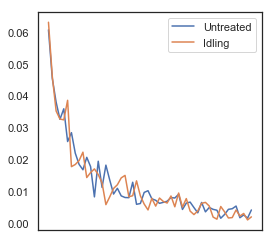

In [35]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_bc_50['Count'].plot(label='Untreated', legend=True)
I_bc_50['Count'].plot(label='Idling', legend=True)
plt.show()

And also normalize the scRNA-seq results:

In [71]:
U_RNA_counts = pd.DataFrame(U.barcode_counts(IDs='all'))
U_RNA_counts_norm = U_RNA_counts.div(U_RNA_counts.sum(axis=0), axis=1)

In [72]:
I_RNA_counts = pd.DataFrame(I.barcode_counts(IDs='all'))
I_RNA_counts_norm = I_RNA_counts.div(I_RNA_counts.sum(axis=0), axis=1)

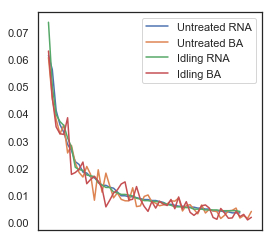

In [79]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_RNA_counts_norm['Barcode'][0:51].plot(label='Untreated RNA', legend=True) # plot ltop 50 barcodes from RNA set
U_bc_50['Count'].plot(label='Untreated BA', legend=True)
I_RNA_counts_norm['Barcode'][0:51].plot(label='Idling RNA', legend=True) # plot ltop 50 barcodes from RNA set
I_bc_50['Count'].plot(label='Idling BA', legend=True)
plt.show()

---
Merge datasets on barcode and print overlay

In [83]:
RNA_totalcounts = U_RNA_counts_norm.merge(I_RNA_counts_norm, left_index=True, right_index=True, how='inner')
BCA_totalcounts = U_bc_counts_norm.merge(I_bc_counts_norm, left_index=True, right_index=True, how='inner')
totalcounts = RNA_totalcounts.merge(BCA_totalcounts, left_index=True, right_index=True, how='inner')

In [86]:
totalcounts.rename(columns={'Barcode_x':'U_RNA', 'Barcode_y':'I_RNA', 'Count_x':'U_BC', 'Count_y':'I_BC'}, inplace=True)

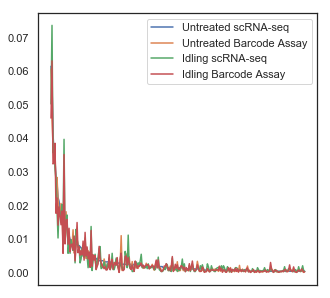

In [88]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(5,5))
totalcounts['U_RNA'].plot(label='Untreated scRNA-seq', legend=True)
totalcounts['U_BC'].plot(label='Untreated Barcode Assay', legend=True)
totalcounts['I_RNA'].plot(label='Idling scRNA-seq', legend=True) 
totalcounts['I_BC'].plot(label='Idling Barcode Assay', legend=True)
plt.show()

---
Split by treatment group for two, less-busy figures

In [94]:
U_totalcounts = U_RNA_counts_norm.merge(U_bc_counts_norm, left_index=True, right_index=True, how='inner')
U_totalcounts.rename(columns={'Barcode':'U_RNA', 'Count':'U_BC'}, inplace=True)

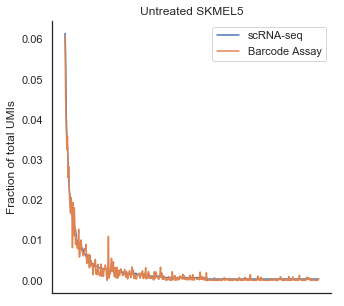

In [102]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(5,5))
U_totalcounts['U_RNA'].plot(label='scRNA-seq', legend=True)
U_totalcounts['U_BC'].plot(label='Barcode Assay', legend=True)
plt.title('Untreated SKMEL5')
plt.ylabel('Fraction of total UMIs')
sns.despine()
plt.show()

In [97]:
I_totalcounts = I_RNA_counts_norm.merge(I_bc_counts_norm, left_index=True, right_index=True, how='inner')
I_totalcounts.rename(columns={'Barcode':'I_RNA', 'Count':'I_BC'}, inplace=True)

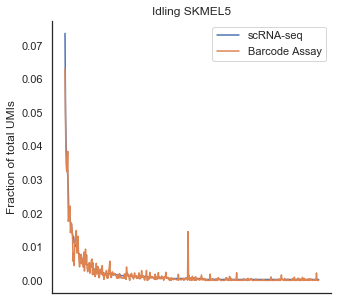

In [103]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(5,5))
I_totalcounts['I_RNA'].plot(label='scRNA-seq', legend=True)
I_totalcounts['I_BC'].plot(label='Barcode Assay', legend=True)
plt.title('Idling SKMEL5')
plt.ylabel('Fraction of total UMIs')
sns.despine()
plt.show()